In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

Using TensorFlow backend.


In [2]:
emotion_data = pd.read_csv('/Users/blakemyers/Desktop/fer2013.csv')
emotion_data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
X_train = []
y_train = []
X_test = []
y_test = []
for index, row in emotion_data.iterrows():
    k = row['pixels'].split(" ")
    if row['Usage'] == 'Training':
        X_train.append(np.array(k))
        y_train.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':
        X_test.append(np.array(k))
        y_test.append(row['emotion'])

In [4]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train= np_utils.to_categorical(y_train, num_classes=7)
y_test = np_utils.to_categorical(y_test, num_classes=7)

In [5]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))


model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [6]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.fit(X_train,y_train,batch_size=32,epochs=30,verbose=1,validation_data=(X_test, y_test))

Train on 28709 samples, validate on 3589 samples
Epoch 1/30
28709/28709 [==============================] - 1790s 62ms/step - loss: 1.8235 - accuracy: 0.2468 - val_loss: 1.8497 - val_accuracy: 0.2494
Epoch 2/30
28709/28709 [==============================] - 1777s 62ms/step - loss: 1.8015 - accuracy: 0.2562 - val_loss: 1.7973 - val_accuracy: 0.2494
Epoch 3/30
28709/28709 [==============================] - 2318s 81ms/step - loss: 1.6526 - accuracy: 0.3520 - val_loss: 1.6839 - val_accuracy: 0.3385
Epoch 4/30
28709/28709 [==============================] - 1773s 62ms/step - loss: 1.5092 - accuracy: 0.4149 - val_loss: 1.6369 - val_accuracy: 0.3316
Epoch 5/30
28709/28709 [==============================] - 1761s 61ms/step - loss: 1.3999 - accuracy: 0.4547 - val_loss: 1.5800 - val_accuracy: 0.3934
Epoch 6/30
28709/28709 [==============================] - 1750s 61ms/step - loss: 1.2946 - accuracy: 0.5048 - val_loss: 1.3002 - val_accuracy: 0.4940
Epoch 7/30
28709/28709 [===========================

In [9]:
local_path = '/Users/blakemyers/Desktop/Jupyter/Project3/TrainedModel'
model.save(local_path)

In [11]:
y_pred=model.predict_classes(X_test)

In [44]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)

In [45]:
cm

array([[221,   7,  53,  29,  92,  11,  54],
       [ 10,  30,   7,   3,   4,   0,   2],
       [ 40,   1, 219,  30, 125,  20,  61],
       [ 24,   2,  29, 724,  49,  16,  51],
       [ 60,   5,  85,  48, 343,   4, 108],
       [ 15,   0,  56,  22,  12, 287,  23],
       [ 44,   1,  43,  73, 122,   8, 316]])

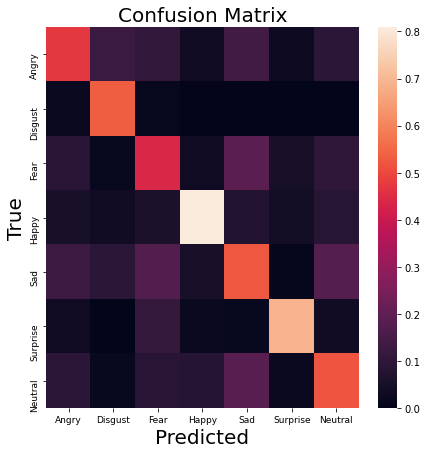

In [54]:
from matplotlib import pyplot as plt
fig,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm / (cm.astype(np.float).sum(axis=1) + 1e-9), annot=False, ax=ax)
ax.set_xlabel('Predicted', size=20);
ax.set_ylabel('True', size=20);
ax.set_title('Confusion Matrix', size=20);
ax.xaxis.set_ticklabels(['Angry','Disgust','Fear','Happy', 'Sad', 'Surprise','Neutral'], size=9); \
ax.yaxis.set_ticklabels(['Angry','Disgust','Fear','Happy', 'Sad', 'Surprise','Neutral'], size=9);

In [56]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")